### 不同年齡層顧客偏好的產品分類分析

## 目標

##### 根據顧客評論內容，探索不同年齡層的顧客，在「Department Name」產品類別上是否有明顯的差異。

## 簡介

##### 此資料集由女裝電商顧客撰寫的評論資料所組成。由於為真實商業資料，公司名稱已被隱藏，替換為「零售商（retailer）」。

##### 變數說明：

##### Clothing ID：服裝 ID，商品的唯一識別碼

##### Age：評論者的年齡

##### Title：評論標題

##### Review Text：評論內容

##### Rating：評分

##### Recommended IND：評論者是否推薦該產品

##### Positive Feedback Count：對評論正面回饋的數量

##### Division Name：產品的分類名稱

##### Department Name：產品的部門名稱

##### Class Name：產品的品類名稱

### 讀取資料

#### 檢查數據結構

In [9]:
import pandas as pd
import numpy as np

In [10]:
original_data=pd.read_csv("womens_clothing_reviews.csv")
original_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


##### 除了第一欄以外，符合每一列爲一個觀察值，每一欄為一個變量，數據夠整齊，但需移除第一欄Unnamed: 0。

In [12]:
cleaned_data=original_data.copy()
cleaned_data=cleaned_data.drop("Unnamed: 0",axis=1)
cleaned_data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


#### 評估數據乾淨度

In [14]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


##### Title,Review Text,Division Name,Department Name,Class Name存在缺失值。
##### Clothing ID,Recommended IND資料型態應改為字串。

In [16]:
cleaned_data["Clothing ID"]=cleaned_data["Clothing ID"].astype(str)
cleaned_data["Recommended IND"]=cleaned_data["Recommended IND"].astype(str)

In [17]:
cleaned_data[cleaned_data["Title"].isnull()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
11,1095,39,NaN,This dress is perfection! so pretty and flatte...,5,1,2,General Petite,Dresses,Dresses
30,1060,33,NaN,Beautifully made pants and on trend with the f...,5,1,0,General Petite,Bottoms,Pants
36,1002,29,NaN,This is a comfortable skirt that can span seas...,4,1,5,General,Bottoms,Skirts
...,...,...,...,...,...,...,...,...,...,...
23450,964,40,NaN,I wanted to love this jacket. so soft and grea...,3,0,4,General,Jackets,Jackets
23453,1104,39,NaN,"I am 5' 2"" about 118 lbs. thought this fit rea...",4,1,0,General Petite,Dresses,Dresses
23458,862,63,NaN,This is my new favorite sweater. it is lightwe...,5,1,0,General Petite,Tops,Knits
23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses


##### Title總共有3810筆資料存在缺失值，因數據量龐大，且其他變量皆含有有效訊息，因此保留數據。

In [19]:
cleaned_data[cleaned_data["Review Text"].isnull()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,861,23,NaN,NaN,5,1,0,General Petite,Tops,Knits
93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses
98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear
135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits
142,1126,35,NaN,NaN,5,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...,...,...
23258,862,35,NaN,NaN,4,1,0,General,Tops,Knits
23301,862,52,NaN,NaN,5,1,0,General,Tops,Knits
23303,823,46,NaN,NaN,5,1,0,General,Tops,Blouses
23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses


##### Review Text總共有845筆資料存在缺失值，因其他變量皆含有有效訊息，且Review Text存在缺失值不影響後續分析，因此保留數據。

In [21]:
cleaned_data[cleaned_data["Division Name"].isnull()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
13787,492,48,NaN,NaN,5,1,0,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN


In [22]:
cleaned_data[cleaned_data["Department Name"].isnull()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
13787,492,48,NaN,NaN,5,1,0,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN


In [23]:
cleaned_data[cleaned_data["Class Name"].isnull()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
13787,492,48,NaN,NaN,5,1,0,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN


##### 從上述三份資料可發現Division Name,Department Name,Class Name存在缺失值的資料相同，因為此次分析目的為探索不同年齡層的顧客，在「Department Name」上是否有明顯的喜好差異，因此須將Department Name存在缺失值的資料清除，避免影響分析結果。

In [25]:
cleaned_data.dropna(subset="Department Name",inplace=True)
cleaned_data["Department Name"].isnull().sum()

0

### 評估不一致數據

##### Rating,Recommended IND,Division Name,Department Name,Class Name等變量需評估是否有不一致數據。

In [28]:
cleaned_data["Rating"].value_counts()

Rating
5    13117
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

##### 無數據不一致的情況發生。

In [30]:
cleaned_data["Recommended IND"].value_counts()

Recommended IND
1    19300
0     4172
Name: count, dtype: int64

##### 無數據不一致的情況發生。

In [32]:
cleaned_data["Division Name"].value_counts()

Division Name
General           13850
General Petite     8120
Initmates          1502
Name: count, dtype: int64

##### 無數據不一致的情況發生，但是Initmates拼寫錯誤，應更改為Intimates。

In [34]:
cleaned_data["Division Name"]=cleaned_data["Division Name"].replace("Initmates","Intimates")

In [35]:
cleaned_data["Division Name"].value_counts()

Division Name
General           13850
General Petite     8120
Intimates          1502
Name: count, dtype: int64

In [36]:
cleaned_data["Department Name"].value_counts()

Department Name
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: count, dtype: int64

##### 無數據不一致的情況發生。

In [38]:
cleaned_data["Class Name"].value_counts()

Class Name
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: count, dtype: int64

##### 無數據不一致的情況發生。

### 評估無效數據或錯誤數據

In [41]:
cleaned_data.describe()

,Age,Rating,Positive Feedback Count
count,23472.000000,23472.000000,23472.000000
mean,43.200707,4.195552,2.537151
std,12.280913,1.110188,5.703597
min,18.000000,1.000000,0.000000
25%,34.000000,4.000000,0.000000
50%,41.000000,5.000000,1.000000
75%,52.000000,5.000000,3.000000
max,99.000000,5.000000,122.000000


##### 以上資料並沒有脫離現實的數字。

### 整理數據

##### 年齡非常廣泛，因此將年齡區間分組，方便後續分析。

In [93]:
age_bins=[0, 20, 30, 40, 50, 60, 100]
age_labels=['20歲以下', '21-30歲', '31-40歲', '41-50歲', '51-60歲', '60歲以上']
cleaned_data["age_group"]=pd.cut(cleaned_data["Age"],bins=age_bins,labels=age_labels)

In [95]:
cleaned_data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_group
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates,Intimate,Intimates,31-40歲
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,31-40歲
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,51-60歲
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,41-50歲
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,41-50歲


### 探索數據

#### 消費者年齡分佈

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")
plt.rcParams['font.family'] = 'AppleGothic' 
plt.rcParams['axes.unicode_minus'] = False

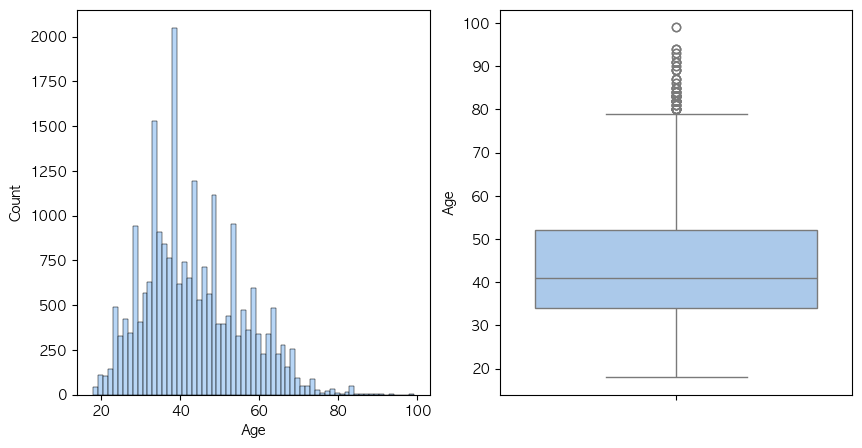

In [101]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.histplot(cleaned_data,x="Age",ax=axes[0])
sns.boxplot(cleaned_data,y="Age",ax=axes[1])
plt.show()

##### 大部分消費者的年齡介於30~60之間，整體偏向右態分佈，有少部分高齡族群拉高平均年齡。

#### 產品類別分佈

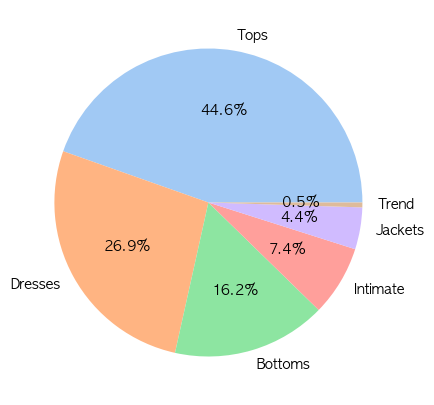

In [105]:
fig,axes=plt.subplots(1,1,figsize=(5,5))
department_name_count=cleaned_data["Department Name"].value_counts()
department_name_labels=department_name_count.index
plt.pie(department_name_count,labels=department_name_labels,autopct="%.1f%%")
plt.show()

##### Tops類別銷售狀況最佳，其次依序為Dresses類別和Bottoms類別。

#### 各年齡區間與產品類別間的關係

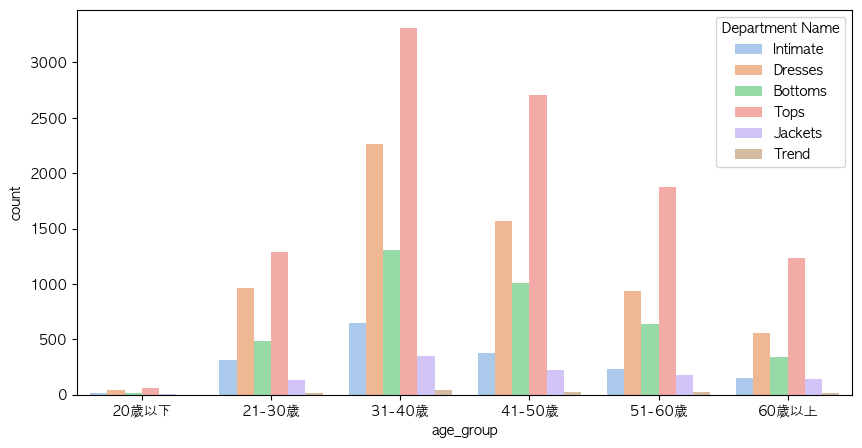

In [109]:
fig,axes=plt.subplots(1,1,figsize=(10,5))
sns.countplot(cleaned_data,x="age_group",hue="Department Name")
plt.show()

##### 1. 最多評論來自31～40歲族群，幾乎在每一種類型（尤其是Tops和Dresses)都佔據最高比例。表示這族群是最活躍的消費者群體，也可能是平台的主要目標客群。

##### 2. Tops上衣為所有年齡層中最多人評論的品項，顯示Tops是最受關注的品類，可能因為穿搭頻率高、選擇多元。

##### 3. 年齡愈高，評論總數明顯減少，60歲以上族群的評論非常少，可能與他們上網/購物比例低有關。若想擴展這類銀髮族群，可考慮改善UX或推出適齡推薦內容。

##### 4. Trend與Jackets評論數普遍偏少，無論哪個年齡層，這兩類產品都明顯較少被討論，可能原因：不常穿、市場接受度低、品項數少

##### 5. Dresses洋裝：中年女性較偏好，31～50歲間較為密集，顯示洋裝偏好在此族群較高。可針對這兩組進行優惠活動、造型搭配推薦等。

### 分析數據

##### 使用卡方檢定，顯著水準設為0.05

##### $H_0$:各年齡區間與所評論的產品類別無顯著的統計關聯性。

##### $H_1$:各年齡區間與所評論的產品類別有顯著的統計關聯性。

In [116]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(cleaned_data["age_group"], cleaned_data["Department Name"])

In [118]:
chi2,p,dof,expected = chi2_contingency(contingency_table)

print("Chi-Square統計值：",chi2)
print("自由度：",dof)
if p < 0.05:
    print(f"p值:{p}，年齡與所評論的產品類別之間有顯著關聯")
else:
    print(f"p值:{p}，年齡與所評論的產品類別之間沒有顯著關聯")

Chi-Square統計值： 202.1916851133987
自由度： 25
p值:1.1605967674146308e-29，年齡與所評論的產品類別之間有顯著關聯


### 結論

##### 不同年齡層的顧客，在評論產品時，對應的產品類別有顯著差異。

##### 可以根據不同年齡層設計客製化的行銷策略：
##### 1.針對31～50 歲推出「日常穿搭Tops/Dresses專區」
##### 2.高齡顧客可能與他們上網購物比例低有關，可考慮改善UX或推出適齡推薦內容。